# **Assignment 1**

## **Information Theory Basics**
Information theory was introduced by Claude Shannon in 1948. It is a mathematical theory that deals with the transmission, processing, utilization, and extraction of information. It has given rise to a wide range of applications, including data compression, cryptography, error correction and fueled other industries such as AI, cellular communications and others.

Using this reference, that you need to study before answering the following question, let (x, y) have the following joint distribution:

If H is the symbol for the entropy functional, answer quantitatively showing your calculations

a. Is H(x|y)=H(y|x)?

b. Is H(x) - H(x|y)=H(y) - H(y|x)?

c. Calculate the mutual information I(x,y).

In [2]:
import numpy as np
from scipy.stats import entropy

def compute_entropy(prob_dist):
    return entropy(prob_dist, base=2)

joint_prob = np.array([
    [1/8,  1/16, 1/32, 1/32],
    [1/16, 1/8,  1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4,  0,    0,    0]])

px = np.sum(joint_prob, axis=0)  # Sum over Y # Compute marginal distributions
py = np.sum(joint_prob, axis=1)  # Sum over X

H_x = compute_entropy(px)
H_y = compute_entropy(py)

H_x_given_y = sum(py[i] * compute_entropy(joint_prob[i] / py[i]) for i in range(len(py)) if py[i] > 0) # conditional entropy H(X|Y)
H_y_given_x = sum(px[j] * compute_entropy(joint_prob[:, j] / px[j]) for j in range(len(px)) if px[j] > 0) # conditional entropy H(Y|X)

I_xy = H_x - H_x_given_y   # mutual information

print(f"H(X) = {H_x:.4f}")
print(f"H(Y) = {H_y:.4f}")
print(f"H(X|Y) = {H_x_given_y:.4f}")
print(f"H(Y|X) = {H_y_given_x:.4f}")
print(f"I(X;Y) = {I_xy:.4f}")
a_condition = np.isclose(H_x_given_y, H_y_given_x)
b_condition = np.isclose(H_x - H_x_given_y, H_y - H_y_given_x)
print(f"Is H(X|Y) = H(Y|X)? {a_condition}") # Solution a
print(f"Is H(X) - H(X|Y) = H(Y) - H(Y|X)? {b_condition}") # Solution b

H(X) = 1.7500
H(Y) = 2.0000
H(X|Y) = 1.3750
H(Y|X) = 1.6250
I(X;Y) = 0.3750
Is H(X|Y) = H(Y|X)? False
Is H(X) - H(X|Y) = H(Y) - H(Y|X)? True


## **Task 1**
Simulate the interarrival times using an exponential distribution with the rate parameter 𝜆=100

[0.01538991 0.00320498 0.00138718 0.00753078 0.00606329 0.00333696
 0.00448602 0.00357486 0.00574762 0.00143928 0.01872282 0.00883961
 0.00891503 0.00511034 0.0008032  0.00362144 0.00069329 0.00554379
 0.00427031 0.03245745]


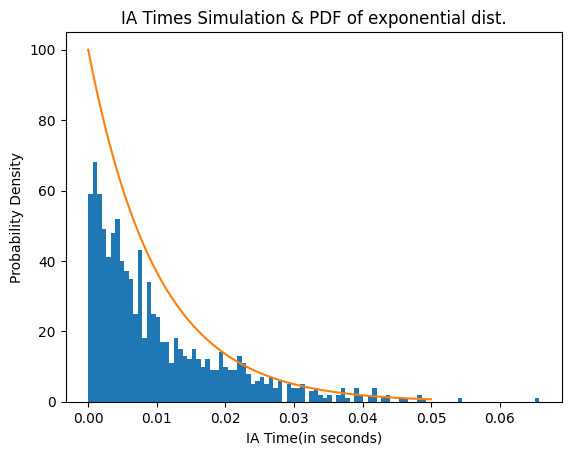

In [145]:
import matplotlib.pyplot as plt
lamb=100
x=np.linspace(0, 0.05, 1000)
interarrival_times = np.random.exponential(scale=1/lamb, size=1000)
print(interarrival_times[:20])
plt.hist(interarrival_times, bins=100)
y=lamb*np.exp(-lamb*x)
plt.plot(x,y)
plt.xlabel('IA Time(in seconds)')
plt.ylabel('Probability Density')
plt.title('IA Times Simulation & PDF of exponential dist.')
plt.show()

## **Task 2**
Use the stochastic gradient descent (SGD) algorithm to minimize the negative log-likelihood of the exponential distribution.

Output:

(a) the estimated parameter after a number of iterations of your choice and

(b) plot the value of objective function over the iteration index.



Estimated Lambda: 98.41025054493508


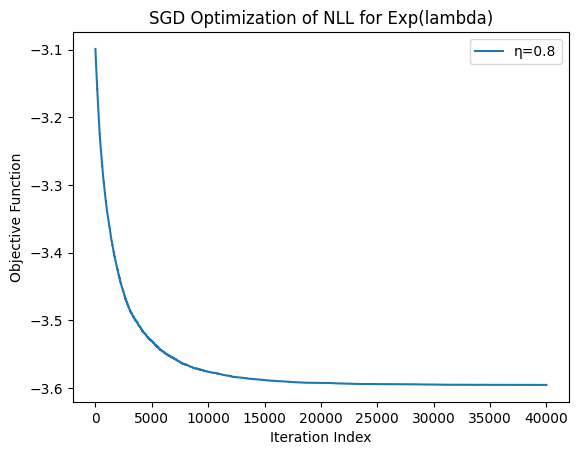

In [147]:
est_lamb = 30  # Random starting point for lambda estimation(my guess)
learning_rate = 0.8 # Random
iterations = 40000  # Random
objective_values = []

for t in range(iterations):
    x_i = np.random.choice(interarrival_times) # Mini batch size = 1 for SGD
    gradient = -1/est_lamb + x_i
    est_lamb -= learning_rate * gradient # New lambda estimated value
    nll = -np.log(est_lamb) + est_lamb * np.mean(interarrival_times) # Negative Log likelihood fn
    objective_values.append(nll)

print("Estimated Lambda:", est_lamb) #Output (a)

plt.plot(range(iterations), objective_values,label=f"η={learning_rate}") #Output (b)
plt.xlabel("Iteration Index")
plt.ylabel("Objective Function")
plt.legend()
plt.title("SGD Optimization of NLL for Exp(lambda)")
plt.show()



## **Linear Regression and SGD**
In class we covered the baseline stochastic gradient descent. Using the linear regression dataset from the class website, develop from scratch the baseline SGD algorithm that can estimate the L2-norm regularized model.

Clearly state the hyper-parameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm and the final values of the parameters
 of the model.

You can generate the dataset with any number of examples
 you need to demonstrate that the algorithm works.

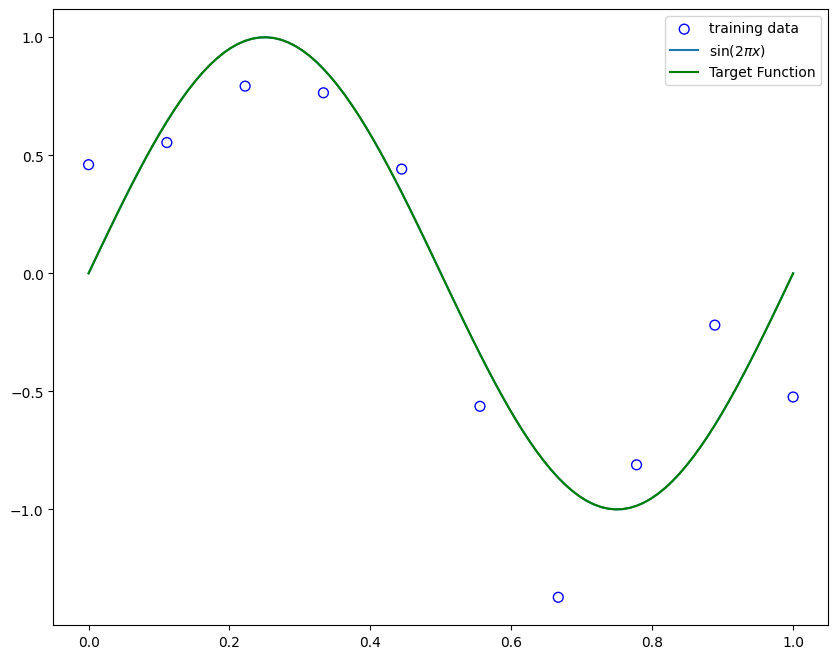

In [141]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()